In [1]:
!git clone https://github.com/shivigup/sunspots

Cloning into 'sunspots'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 17 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [3]:
df = pd.read_csv("sunspots/data/Sunspots.csv")
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.dtypes

Date                                 datetime64[ns]
Monthly Mean Total Sunspot Number           float64
dtype: object

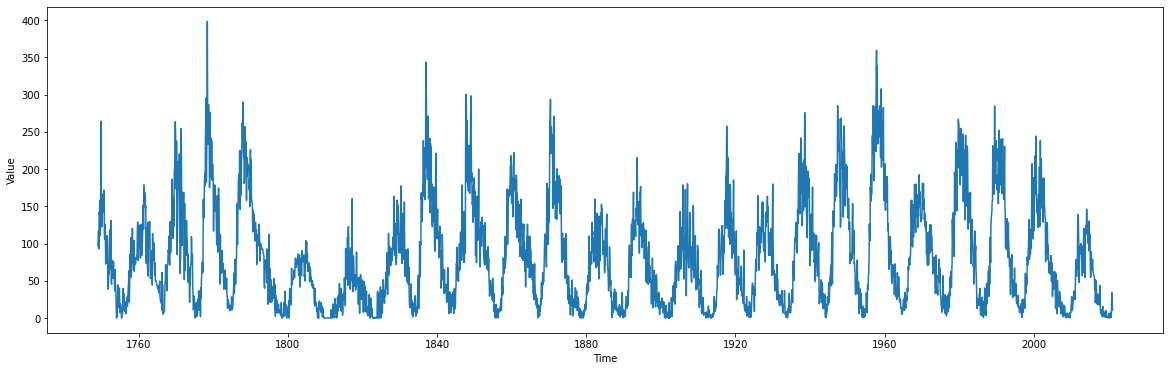

In [16]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    #plt.grid(True)

plt.figure(figsize=(20, 6))
plot_series(df['Date'], df['Monthly Mean Total Sunspot Number'])
plt.savefig("plot_raw.png")
plt.show()

In [15]:
df.shape

(3265, 2)

In [18]:
time = df['Date']
series = df['Monthly Mean Total Sunspot Number']

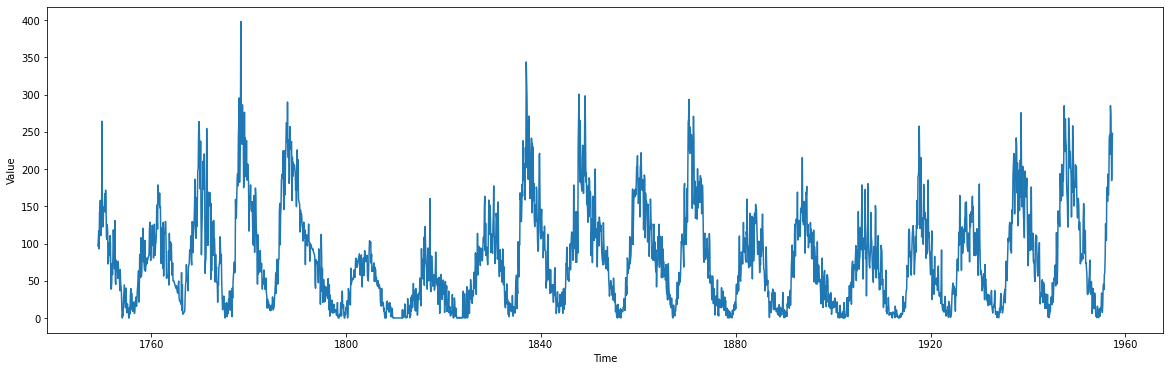

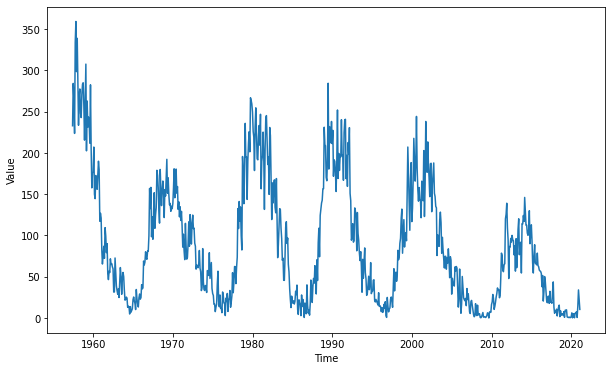

In [19]:
split_time = 2500
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
plt.figure(figsize=(20, 6))
plot_series(time_train, x_train)
plt.savefig("train_data.png")
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.savefig("test_data.png")
plt.show()

In [20]:
naive_forecast = series[split_time - 1:-1]

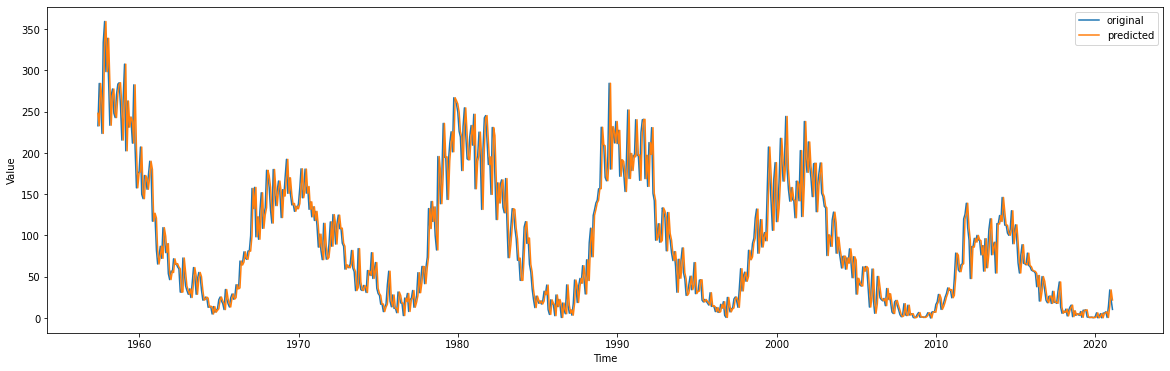

In [25]:
plt.figure(figsize=(20, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)
plt.legend(["original", "predicted"])
plt.savefig("naive_forecast.png")

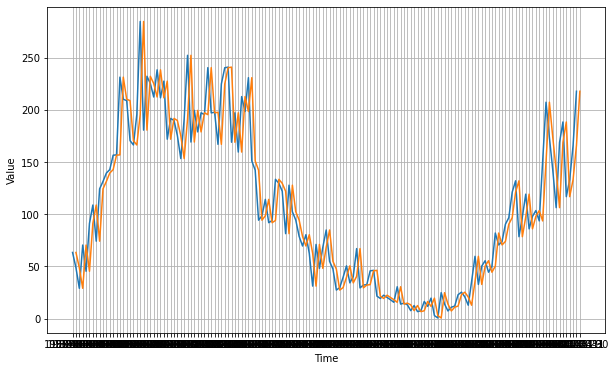

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)
plt.savefig("naive_forecast_validation.png")

In [26]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

664.8773856209151
18.43084967320261


Moving average

In [27]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

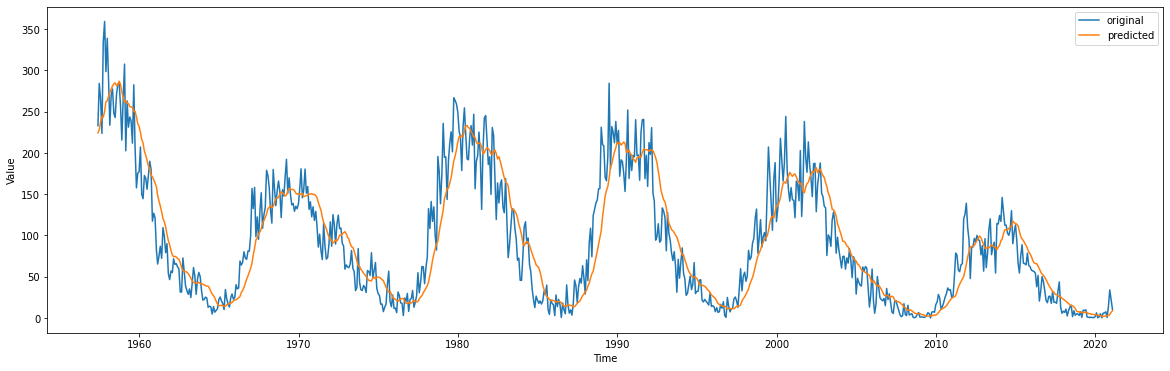

In [37]:
window_size = 12
moving_avg = moving_average_forecast(series, window_size)[split_time - window_size:]

plt.figure(figsize=(20, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)
plt.legend(["original", "predicted"])
plt.savefig("moving_average.png")

In [35]:
print(keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

971.2869187545388
23.016982570806103


In [36]:
period = 11*12

In [38]:
diff_series_1 = series[period:].to_numpy()
diff_series_2 = series[:-period].to_numpy()
diff_series = diff_series_1 - diff_series_2
diff_time = time[period:]

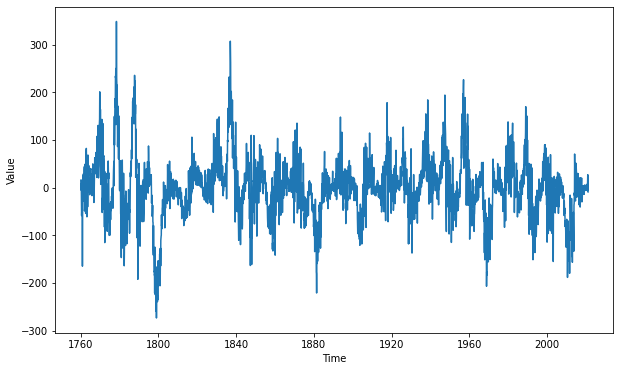

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()
plt.savefig("remove_seasonality.png")

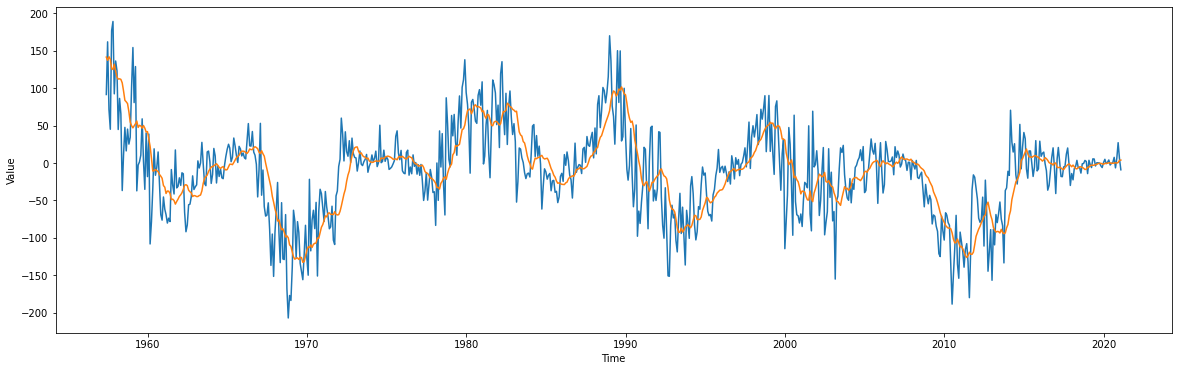

In [41]:
diff_moving_avg = moving_average_forecast(diff_series, window_size)[split_time - period - window_size:]

plt.figure(figsize=(20, 6))
plot_series(time_valid, diff_series[split_time - period:])
plot_series(time_valid, diff_moving_avg)
plt.show()

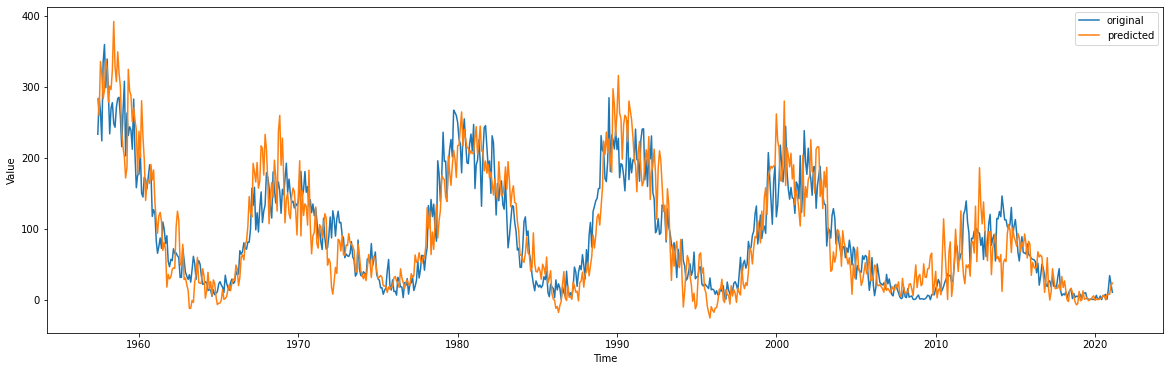

In [43]:
diff_moving_avg_plus_past = series[split_time - period:-period] + diff_moving_avg

plt.figure(figsize=(20, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.legend(["original", "predicted"])
plt.savefig("diff_moving_average_1.png")
plt.show()

In [44]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

1547.4861963507626
29.45162309368191


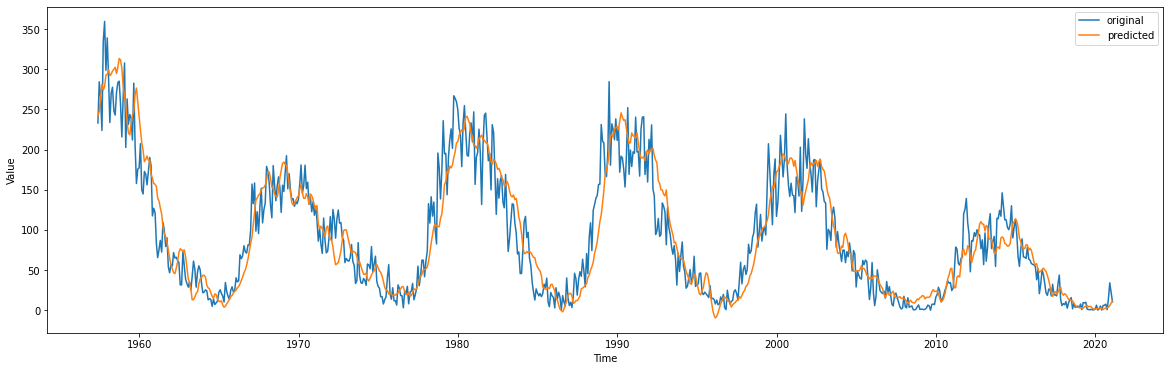

In [49]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - (period+6):-period], 6) + diff_moving_avg

plt.figure(figsize=(20, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.legend(["original", "predicted"])
plt.savefig("diff_moving_average.png")
plt.show()

In [48]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

870.7166429738563
21.974760348583878
